<a href="https://colab.research.google.com/github/Jake0925/Object-Detection/blob/main/Yolo5_Helmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의:  https://www.youtube.com/watch?v=T0DO1C8uYP8&list=PL6eFuyJRe7bh-_qfWHBAXZIWHMLXmf26M&index=1

참고:  https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb

roboflow사이트에서 dataset URL을 복사한후 

Colab창에서 좌측의 파일버튼을 눌러 sample_data를 먼저클릭 한번하고

Colab에 코드를 작성하여 dataset파일을 다운받는다 

In [ ]:
!curl -L https://public.roboflow.com/ds/hpbLk1QY9u?key=GCftDbGVes > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

yolov5설치
- content폴더안에 yplov5폴더가 생생된다

In [ ]:
%cd /content/drive/MyDrive/DeepLearning/Yolov5 
# dataset파일이 속해있는 상위폴더인 content폴더로 이동
!git clone https://github.com/ultralytics/yolov5.git
 # YOLO5파일이 있는 Repository경로를 복사하여 붙어넣는다

/content/drive/MyDrive/DeepLearning/Yolov5
Cloning into 'yolov5'...
remote: Enumerating objects: 6127, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 6127 (delta 83), reused 101 (delta 64), pack-reused 5980
Receiving objects: 100% (6127/6127), 8.70 MiB | 10.63 MiB/s, done.
Resolving deltas: 100% (4175/4175), done.


yolov5를 위해 필요설치파일 다운로드 및 설치

In [ ]:
%cd /content/drive/MyDrive/DeepLearning/Yolov5/yolov5
!pip install -r requirements.txt

In [ ]:
%cat /content/dataset/data.yaml # Yolo애서 읽어드릴 train과 val의 경로, 클래스종류, 개수등 데이터가 들어있다,  nc-클래스갯수, names-각클래스이름

train: ../train/images
val: ../valid/images

nc: 3
names: ['head', 'helmet', 'person']

이디지파일 list에 담기

In [ ]:
%cd /
from glob import glob

img_list = glob('/content/dataset/train/images/*.jpg')

print(len(img_list)) # 총 이미지 갯수

/
5364


train과 valid 이미지 데이터로 분류하여 파일이름 List에 담기

In [ ]:
from sklearn.model_selection import train_test_split
train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=5000)
print(len(train_img_list), len(val_img_list))

4291 1073


train과 val 로 분류된 이미지 파일이름 각각의 txt파일에 write
 
 -txt파일은 이미지가 포함되어있는폴더의 상위폴더에 있어야한다 

In [ ]:
with open('/content/dataset/train/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/dataset/train/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

#  yaml파일에 train 과 val의 이미지파일이 적혀있는 txt파일경로 값 변경

In [ ]:
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.load(f)

print(data)

data['train'] = '/content/dataset/train/train.txt'
data['val'] = '/content/dataset/train/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['head', 'helmet', 'person'], 'nc': 3, 'train': '/content/dataset/train/train.txt', 'val': '/content/dataset/train/val.txt'}
{'names': ['head', 'helmet', 'person'], 'nc': 3, 'train': '/content/dataset/train/train.txt', 'val': '/content/dataset/train/val.txt'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


# 모델 학습

In [ ]:
%cd /content/yolov5/

!python train.py --img 416 --batch 16 --epochs 70 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name Helmet_yolov5s_results

#cfg - 모델을 정의한 파일로서 yolov5/models 폴더안에 yolov5l.yaml, yolov5m.yaml, yolov5s.yaml, yolo5x.yaml등으로 
#정의되어있다다

텐서보드에 학습결과 표시

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/

valid 이미지 테스트

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/dataset/train/images/005212_jpg.rf.f13eef5008a7d33422485257b4b8e7fc.jpg', update=False, view_img=False, weights=['/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'])
YOLOv5 🚀 v5.0-39-g1849916 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/dataset/train/images/005212_jpg.rf.f13eef5008a7d33422485257b4b8e7fc.jpg: 416x416 2 helmets, Done. (0.009s)
Results saved to runs/detect/exp
Done. (0.019s)


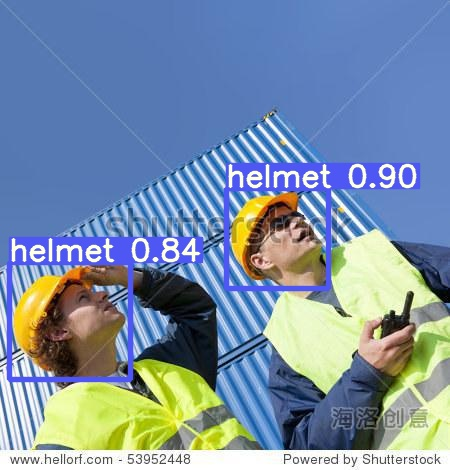

In [ ]:
from IPython.display import Image
import os

val_img_path = val_img_list[2]

!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}" 
# conf - 최소 매칭율, img 416 - 이미지사이즈가 416픽셀, weights - train으로 추출된 학습결과
Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img_path))) # 저장경로에 저장된 검출이미지모습보여주기모습보여주기

# 이미지 테스트
- 학습데이터 .pt 파일만 불러와서 사용하는 방법


In [ ]:
%cd /
from glob import glob

Testimg_list = glob('/content/drive/MyDrive/aaa/*.jpg')  # 이미지파일 경로입력하여 List에 담기
ImgCount = len(Testimg_list) # 폴더안의 이미지 파일 총갯수
print(ImgCount) 

/
130


In [ ]:
%cd /content/drive/MyDrive/DeepLearning/Yolov5/yolov5
# detect.py 파일이 들어있는 경로를 반드시 지정해줘야한다

for i in range(ImgCount):
  val_img_path = Testimg_list[i]  # 이미지파일 경로삽입
  !python detect.py --weights /content/drive/MyDrive/DeepLearning/Yolov5/best.pt --img 416 --conf 0.5 --source "{val_img_path}" --project "detect2" --name "Result" --save-txt --nosave  --exist-ok 
# conf - 최소 매칭율, 
# img 416 - 이미지사이즈를 416픽셀 크기로 변환하여 검사
# weights - 학습된 ".pt"파일이 있는 경로 지정 
# --source - 검사할 이미지파일 경로
# --project - 결과값을 저장할 폴더이름 초기값 detect
# --name - 결과값을 저장을 하위폴더이름 초기값 exp
# --save-txt - label값 저장사용
# --nosave - 결과표시된 이미지 저장 사용안함
# --exist-ok - 결과값 저장시 같은이름의 폴더저장, 이걸 사용안하는경우 검사할때마대 새로운이름의 폴더가 생성됨

/content/drive/MyDrive/DeepLearning/Yolov5/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, line_thickness=3, name='Result', nosave=False, project='detect2', save_conf=False, save_crop=False, save_txt=True, source='/content/drive/MyDrive/aaa/001150.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/DeepLearning/Yolov5/best.pt'])
YOLOv5 🚀 v5.0-60-ge2a80c6 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/aaa/001150.jpg: 288x416 4 helmets, Done. (0.010s)
Results saved to detect2/Result
1 labels saved to detect2/Result/labels
Done. (0.827s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, line_thickness=3, name='Result', no

In [ ]:
# 검사결과모습 보기

from IPython.display import Image
import os
Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img_path))) # 저장경로에 저장된 검출이미지모습보여주기모습보여주기

# 동영상파일의 경우


In [ ]:
python detect.py --source 동영상파일경로ython detect.py --source 동영상파일경로.mp4 --weights weight파일경로/best.pt.mp4 --weights weight파일경로/best.pt